In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext rpy2.ipython

In [ ]:
# <%%R> has to be used in each cell with R-Code, with <%R> R-Code can be mixed with Python
%%R
df <- readRDS("/content/drive/MyDrive/Colab Notebooks/22-kostat-paper/cfa_jt_total.rda")

In [ ]:
%%R
str(df)

'data.frame':	10623 obs. of  7 variables:
 $ 성취요인    : num  -1.219 -1.219 -0.219 -0.219 -1.219 ...
 $ 관계요인    : num  0.28 -1.72 -0.72 -0.72 -0.72 ...
 $ 여가요인    : num  0.861 -0.139 -0.139 -0.139 -0.139 ...
 $ 소득요인    : num  -0.9134 0.0866 1.0866 -0.9134 1.0866 ...
 $ 소비요인    : num  -0.0104 -0.0104 0.9896 -0.0104 -1.0104 ...
 $ 근로여건요인: num  -0.276 0.295 -0.416 -0.538 0.488 ...
 $ 주관적만족감: Factor w/ 2 levels "불만족","만족": 1 1 2 2 1 2 2 2 1 2 ...


In [ ]:
# %%R
# install.packages("tidyverse")
# install.packages("caret")
# install.packages("h2o")
# install.packages("MLmetrics")
# install.packages("yardstick")
# install.packages("pROC")

In [ ]:
# %%R

# library(tidyverse)
# library(caret)
# library(h2o)

# library(MLmetrics)
# library(yardstick)
# library(pROC)

# 2 classfication Model using h2o package

## AutoML Model

In [ ]:
## h2o
%%R
str(df)

'data.frame':	2040 obs. of  7 variables:
 $ 성취요인    : num  -1.467 -1.467 -0.467 -1.467 0.533 ...
 $ 관계요인    : num  0.145 -1.855 -0.855 -0.855 1.145 ...
 $ 여가요인    : num  0.681 -0.319 -0.319 -0.319 1.681 ...
 $ 소득요인    : num  -1.11 -0.11 -1.11 0.89 1.89 ...
 $ 소비요인    : num  -0.226 -0.226 -0.226 -1.226 0.774 ...
 $ 근로여건요인: num  -0.505 0.056 -0.766 0.235 0.494 ...
 $ 주관적만족감: Factor w/ 2 levels "불만족","만족": 1 1 2 1 2 2 2 2 2 2 ...


In [ ]:
%%R
## h2o
set.seed(2022)
idx <- createDataPartition(df$주관적만족감, p = .7, list = F)

# Train, Test Set
h2o.init()
train <- as.h2o(df[idx, ])
test  <- as.h2o(df[-idx, ])

test_y <- df[-idx,"주관적만족감"] # for Metric

# Identify predictors and response
y <- "주관적만족감"
x <- setdiff(names(train), y)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         22 minutes 18 seconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.36.1.2 
    H2O cluster version age:    1 month and 6 days  
    H2O cluster name:           H2O_started_from_R_root_okz590 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.17 GB 
    H2O cluster total cores:    2 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    R Version:                  R version 4.2.0 (2022-04-22) 

  |======================================================================| 100%
  |======================================================================| 100%


In [ ]:
%%R

nfolds = 10

In [ ]:
%%R
# Run AutoML for 20 base models

aml <- h2o.automl(x = x, y = y,
                  training_frame = train,
                  nfolds = nfolds,
                  keep_cross_validation_predictions = TRUE,
                  max_models = 20,
                  seed = 1)

  |======================================================================| 100%


In [ ]:
%%R
aml

AutoML Details
Project Name: AutoML_1_20220703_80106 
Leader Model ID: StackedEnsemble_AllModels_1_AutoML_1_20220703_80106 
Algorithm: stackedensemble 

Total Number of Models Trained: 22 
Start Time: 2022-07-03 08:01:06 UTC 
End Time: 2022-07-03 08:44:03 UTC 
Duration: 2577 s

Leaderboard
                                                 model_id       auc   logloss
1     StackedEnsemble_AllModels_1_AutoML_1_20220703_80106 0.8418975 0.3419046
2  StackedEnsemble_BestOfFamily_1_AutoML_1_20220703_80106 0.8416257 0.3425028
3                           GBM_1_AutoML_1_20220703_80106 0.8405823 0.3433366
4              GBM_grid_1_AutoML_1_20220703_80106_model_2 0.8399529 0.3442695
5              GBM_grid_1_AutoML_1_20220703_80106_model_1 0.8392534 0.3454348
6                           GBM_5_AutoML_1_20220703_80106 0.8382147 0.3468563
7                           GBM_2_AutoML_1_20220703_80106 0.8364028 0.3475370
8                           GBM_3_AutoML_1_20220703_80106 0.8342709 0.3496392
9     D

In [ ]:
# %%R
# # Get leaderboard with all possible columns
# lb <- h2o.get_leaderboard(object = aml, extra_columns = "ALL")
# lb

<simpleError in .key.validate(destination_frame): `key` must match the regular expression '^[a-zA-Z_][a-zA-Z0-9_.]*$': $4175746f4d4c5f335f32303232303730315f33333435374040fc0001cc7110$_extended_leaderboard>


In [ ]:
%%R
my_stack <- h2o.getModel("StackedEnsemble_AllModels_1_AutoML_1_20220703_80106")

In [ ]:
%%R
summary(my_stack)

Model Details:

H2OBinomialModel: stackedensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220703_80106 
Number of Base Models: 20

Base Models (count by algorithm type):

deeplearning          drf          gbm          glm      xgboost 
           4            2            7            1            6 

Metalearner:

Metalearner algorithm: glm
Metalearner cross-validation fold assignment:
  Fold assignment scheme: AUTO
  Number of folds: 10
  Fold column: NULL
Metalearner hyperparameters: 

H2OBinomialMetrics: stackedensemble
** Reported on training data. **

MSE:  0.09810336
RMSE:  0.3132146
LogLoss:  0.3230923
Mean Per-Class Error:  0.2340259
AUC:  0.8645379
AUCPR:  0.6505587
Gini:  0.7290758

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
       만족 불만족    Error       Rate
만족   4445    476 0.096728  =476/4921
불만족  404    684 0.371324  =404/1088
Totals 4849   1160 0.146447  =880/6009

Maximum Metrics: Maximum metrics at their respective thre

In [ ]:
# %%R

# m@parameters

In [ ]:
%%R
pred.h2o <- h2o.predict(my_stack, test)
pred_y <- as.factor(as.vector(pred.h2o$predict))
pred_y <- fct_rev(pred_y) # 불만족(참조변수), 만족(관심변수)

  |======================================================================| 100%


In [ ]:
# %%R
# confusionMatrix(as.factor(test_y), as.factor(pred_y), positive="만족")

In [ ]:
%%R
round(MLmetrics::Accuracy(test_y, pred_y), 2)

[1] 0.86


In [ ]:
%%R
round(MLmetrics::F1_Score(test_y, pred_y, positive="만족"), 2)

[1] 0.91


In [ ]:
%%R
round(MLmetrics::Precision(test_y, pred_y, positive="만족"), 2)

[1] 0.92


In [ ]:
%%R
round(MLmetrics::Recall(test_y, pred_y, positive="만족"), 2)

[1] 0.91


In [ ]:
%%R
str(aml)

Formal class 'H2OAutoML' [package "h2o"] with 6 slots
  ..@ project_name  : chr "AutoML_3_20220701_33457"
  ..@ leader        :Formal class 'H2OBinomialModel' [package "h2o"] with 7 slots
  .. .. ..@ model_id     : chr "GBM_1_AutoML_3_20220701_33457"
  .. .. ..@ algorithm    : chr "gbm"
  .. .. ..@ parameters   :List of 21
  .. .. .. ..$ model_id                         : chr "GBM_1_AutoML_3_20220701_33457"
  .. .. .. ..$ training_frame                   : chr "AutoML_3_20220701_33457_training_data.frame_sid_bbf7_166"
  .. .. .. ..$ nfolds                           : num 10
  .. .. .. ..$ keep_cross_validation_models     : logi FALSE
  .. .. .. ..$ keep_cross_validation_predictions: logi TRUE
  .. .. .. ..$ score_tree_interval              : num 5
  .. .. .. ..$ fold_assignment                  : chr "Modulo"
  .. .. .. ..$ ntrees                           : num 32
  .. .. .. ..$ max_depth                        : num 15
  .. .. .. ..$ min_rows                         : num 100
  .. ..

## Custom Model


In [ ]:
%%R
################
# CUSTOM MODEL
################
# Set number of folds for base learners
nfolds <- 10

### Train & Cross-validate a GLM model

In [ ]:
%%R
# https://docs.h2o.ai/h2o-tutorials/latest-stable/tutorials/glm/glm.html
my_glm = h2o.glm(training_frame = train, validation_frame = test,
                 x = x, y = y,
                 nfolds = nfolds,
                 keep_cross_validation_predictions = TRUE,
                 family='binomial')

# h2o.confusionMatrix(my_glm, valid=TRUE)

  |======================================================================| 100%


### Train & Cross-validate a GBM model

In [ ]:
%%R
my_gbm <- h2o.gbm(x = x,
                  y = y,
                  training_frame = train,
                  distribution = "bernoulli",
                  ntrees = 10,
                  nfolds = nfolds,
                  keep_cross_validation_predictions = TRUE,
                  seed = 1)

  |======================================================================| 100%


### Train & Cross-validate an RF model

In [ ]:
%%R
my_rf <- h2o.randomForest(x = x,
                          y = y,
                          training_frame = train,
                          ntrees = 100,
                          nfolds = nfolds,
                          keep_cross_validation_predictions = TRUE,
                          seed = 1)

  |======================================================================| 100%


### Train & Cross-validate an DL model

In [ ]:
%%R
my_dl <- h2o.deeplearning(x = x,
                          y = y,
                          training_frame = train,
                          nfolds = nfolds,
                          keep_cross_validation_predictions = TRUE,
                          seed = 1)

  |======================================================================| 100%


### Train & Cross-validate an XGB model

In [ ]:
%%R
hf <- as.h2o(df)
# Set the predictors and response; set the response as a factor:
hf['주관적만족감'] <- as.factor(hf['주관적만족감'])
predictors <- setdiff(colnames(df), "주관적만족감")
response <- "주관적만족감"

# Split the dataset into a train and valid set:
hf_splits <- h2o.splitFrame(data =  train, ratios = 0.7, seed = 1)
train <- hf_splits[[1]]
valid <- hf_splits[[2]]

  |======================================================================| 100%


In [ ]:
%%R
# Build and train the model:
my_xgb <- h2o.xgboost(x = predictors,
                      y = response,
                      training_frame = train,
                      validation_frame = valid,
                      distribution = 'bernoulli',
                      #  booster = "gbtree", "dart", "gblinear"
                      nfolds = nfolds,
                      keep_cross_validation_predictions = TRUE,
                      normalize_type = "tree",
                      seed = 1)

  |======================================================================| 100%


In [ ]:
# %%R
# # Eval performance:
# perf <- h2o.performance(my_xgb)
# perf

# %%R
# # Generate predictions on a test set (if necessary):
# pred <- h2o.predict(my_xgb, newdata = valid)
# pred

## 성능 평가




In [ ]:
%%R
perf <- h2o.performance(my_dl, test)
auroc <- h2o.auc(perf)
round(auroc, 2)

[1] 0.84


In [ ]:
%%R
pred.h2o <- h2o.predict(my_dl, test)
pred_y <- as.factor(as.vector(pred.h2o$predict))
pred_y <- fct_rev(pred_y) # 불만족(참조변수), 만족(관심변수)

  |======================================================================| 100%


In [ ]:
%%R
round(MLmetrics::Accuracy(test_y, pred_y), 2)

[1] 0.84


In [ ]:
%%R
round(MLmetrics::F1_Score(test_y, pred_y, positive="만족"), 2)

[1] 0.9


In [ ]:
%%R
round(MLmetrics::Precision(test_y, pred_y, positive="만족"), 2)

[1] 0.92


In [ ]:
%%R
round(MLmetrics::Recall(test_y, pred_y, positive="만족"), 2)

[1] 0.89


### ROC Curve


### ggROC

In [ ]:
%%R
# install.packages("pROC")
library('pROC')

In [ ]:
%%R
prob_y <- predict(my_dl, test, type="prob")[,"만족"]

  |======================================================================| 100%


In [ ]:
%%R
prob_y <- as.data.frame(prob_y)[,"만족"]
str(prob_y)

 num [1:3186] 0.792 0.996 0.808 0.953 0.933 ...


In [ ]:
%%R
roc.object <- pROC::roc(test_y, prob_y)

R[write to console]: Setting levels: control = 불만족, case = 만족

R[write to console]: Setting direction: controls < cases



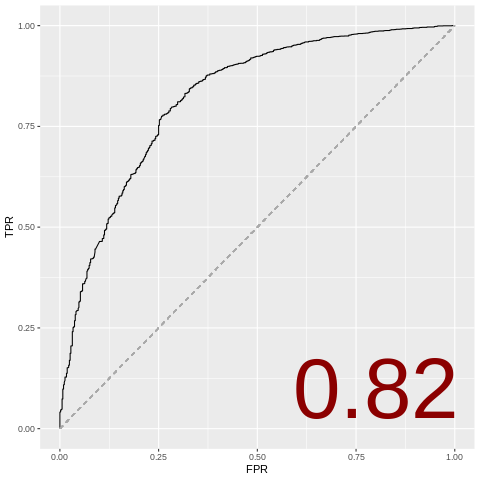

In [ ]:
%%R
# g <- ggroc(roc.object)
gl <- ggroc(roc.object, legacy.axes = TRUE)
gl + xlab("FPR") + ylab("TPR") + 
    geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype="dashed") +
    annotate("text", x=0.8, y=0.1, label=round(auroc,2), color="darkred", size=30)
    # +
    # annotate("text", x=0.1, y=1, label="ROC Curve", color="Black", size=7.5)

## 모델 저장

In [ ]:
%%R
# Save model
path = "/content/drive/MyDrive/Colab Notebooks/22-kostat-paper"
h2o.saveModel(my_gbm, path, filename="cfa_jt_total_n")

[1] "/content/drive/MyDrive/Colab Notebooks/22-kostat-paper/cfa_jt_total_n"


In [ ]:
%%R
# convert feature variables to a data frame - tibble is also a data frame 
x_valid <- test %>% as.data.frame %>% select(-"주관적만족감") %>% as_tibble()
# change response variable to a numeric binary vector
y_valid <- as.vector(as.numeric(test$주관적만족감))

In [ ]:
%%R
str(y_valid)

 int [1:3186] 0 0 1 0 0 0 1 0 0 0 ...


In [ ]:
%%R
# create custom predict function
pred <- function(model, newdata)  {
  results <- as.data.frame(h2o.predict(model, newdata %>% as.h2o()))
  return(results[[3L]])
  }

In [ ]:
# %%R
# install.packages("DALEX")
# install.packages("DALEXtra")

In [ ]:
%%R
library("DALEX")
library("DALEXtra")

In [ ]:
%%R
explainer_gbm <- explain(
  model            = my_gbm, 
  type             = "classification",
  data             = x_valid,
  y                = y_valid,
  predict_function = pred,
  label            = "h2o_gbm"
  )

Preparation of a new explainer is initiated
  -> model label       :  h2o_gbm 
  -> data              :  3186  rows  6  cols 
  -> data              :  tibble converted into a data.frame 
  -> target variable   :  3186  values 
  -> predict function  :  pred 
  -> predicted values  :  No value for predict function target column. (  default  )
  |======================================================================| 100%
  |======================================================================| 100%
  -> model_info        :  package h2o , ver. 3.36.1.2 , task classification (  default  ) 
  -> model_info        :  type set to  classification 
  |======================================================================| 100%
  |======================================================================| 100%
  -> predicted values  :  numerical, min =  0.07143216 , mean =  0.1728428 , max =  0.7043401  
  -> residual function :  difference between y and yhat (  default  )
  |====================

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

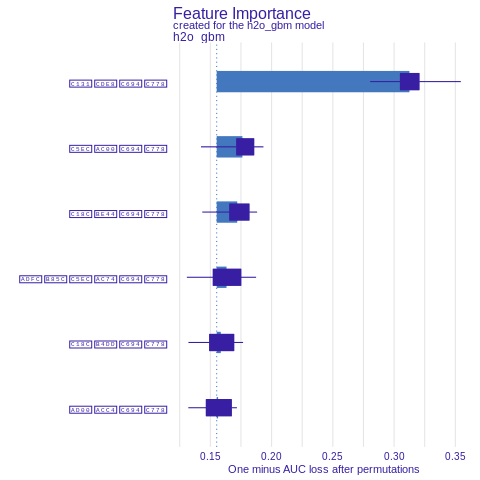

In [ ]:
%%R
fi_gbm <- model_parts(explainer_gbm)
plot(fi_gbm)